<a href="https://colab.research.google.com/github/Iamnir/Computational-Economics-/blob/main/Niranjan_Kumar_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analysis of 2021 market for dummy movies data


1. Create Dummy Movies Data (Movie Name, rating, Genre, Box_Office)

         I am trying to create a dataset consisting 4 columns and 
        they are Movie_Name (type= string), rating (type= float), Genre(type= String) and box_office (type = int). 
         To add currency in the box_office column I have used apply function to the list box_office of the dataframe. 
         Thus new datatype of this column would be string. 
               

In [ ]:
#import libraries 
import pandas as pd
import numpy as np
#Since we are creating dummy data then ratings are being generated randomly (not IMDb ratings)
data =  pd.DataFrame({"Movie_Name" : ["Spiderman:No Way Home","Eternals","Don't Look Up","The Fallout","The Last Duel", "Dune", "Nobody"], "rating" : np.random.uniform(10, size=7),"box_office" : np.random.randint(10000000, size=7), "Genre": ["Action", "Action","Comedy", "Drama", "Drama", "Sci-fi", "Thriller" ]})
#Add currency to box_office column in dataframe
data['box_office'] =data['box_office'].apply(lambda x: "${:}".format((x)))
#round off the datafram till 2 decimal places, just to make it look nice 
data.round(2)

,Movie_Name,rating,box_office,Genre
0,Spiderman:No Way Home,5.45,$950870,Action
1,Eternals,2.31,$3047508,Action
2,Don't Look Up,1.57,$8840305,Comedy
3,The Fallout,3.93,$1074883,Drama
4,The Last Duel,1.65,$9632128,Drama
5,Dune,6.59,$4138262,Sci-fi
6,Nobody,6.02,$6766023,Thriller


2. Analysis of the dummy data 
          In the beginning of this section, I try to calculate mean and median of 
          two numeric columns. The purpose is to use them during visualization and also to the analysis.  
          

In [ ]:
round(data['rating'].mean(),2) #round the mean value of rating variable till 2 decimal places 

3.93

In [ ]:
round(data['rating'].median(), 2)

3.93

         There is an issue with box_office column when I tried to calculate the mean value. 
         The Datatype of box_office is string. 
         First removed the currency symbol from box_office. 
         But the data type of box_office is still string. 
         Changed the datatype to integer and calculated the mean value.            

In [ ]:
#To calculate the mean and median of box_office,first we need to remove the currency symbol add a new variable which has datatypes integer 
data['box_office_amount'] = data.box_office.apply(lambda x: x[1:].split("/")[0])
data

,Movie_Name,rating,box_office,Genre,box_office_amount
0,Spiderman:No Way Home,5.454439,$950870,Action,950870
1,Eternals,2.308109,$3047508,Action,3047508
2,Don't Look Up,1.568850,$8840305,Comedy,8840305
3,The Fallout,3.925673,$1074883,Drama,1074883
4,The Last Duel,1.645907,$9632128,Drama,9632128
5,Dune,6.587720,$4138262,Sci-fi,4138262
6,Nobody,6.018106,$6766023,Thriller,6766023


In [ ]:
#Above we have removed the currency from box_office column and let's calculate the mean value
data['box_office_amount'].mean()
# In the shell you will see a large value something like 1.3583861496441263e+47 because we didn't check the datatype of column box_office_amount. 

4921425.571428572

In [ ]:
#check the datatype of new column 
Type = data.dtypes['box_office_amount']
print(Type)

object


In [ ]:
#As we can see that if we perform mean function on object datatype then it will give us incorrect result. 
# Let's change the datatype of box_office_amount from string to int. 
data['box_office_amount'] = data['box_office_amount'].astype(str).astype(int)
print(data.dtypes)

Movie_Name            object
rating               float64
box_office            object
Genre                 object
box_office_amount      int64
dtype: object


In [ ]:
#Now calculate the mean value and we get the right amount. 
round(data['box_office_amount'].mean(), 3)

4921425.571

                Here, I am trying to calculate the frequencies of the column Movie_Name. 
                Also frequencies of two columns together to see how many times one particular combination appears in the dataset. 
                In multiindexing columns, just an attempt to look at one dataset differently. 
                

In [ ]:
#calculate frequencies of string columns 
data['Movie_Name'].value_counts()

Spiderman:No Way Home    1
Eternals                 1
Don't Look Up            1
The Fallout              1
The Last Duel            1
Dune                     1
Nobody                   1
Name: Movie_Name, dtype: int64

In [ ]:
#Calculate the frequencies of variable Movie_Name and Genre together 
data.groupby(['Movie_Name', 'Genre']).size()

Movie_Name             Genre   
Don't Look Up          Comedy      1
Dune                   Sci-fi      1
Eternals               Action      1
Nobody                 Thriller    1
Spiderman:No Way Home  Action      1
The Fallout            Drama       1
The Last Duel          Drama       1
dtype: int64

In [ ]:
#create a multiindex using columns Genre and rating
data.set_index(['Genre', 'rating'])

Movie_Name box_office  box_office_amount
Genre    rating                                                       
Action   5.454439  Spiderman:No Way Home    $950870             950870
         2.308109               Eternals   $3047508            3047508
Comedy   1.568850          Don't Look Up   $8840305            8840305
Drama    3.925673            The Fallout   $1074883            1074883
         1.645907          The Last Duel   $9632128            9632128
Sci-fi   6.587720                   Dune   $4138262            4138262
Thriller 6.018106                 Nobody   $6766023            6766023

In [ ]:
#To find the percentage of each unique values in column rating
data['rating'].value_counts(normalize=True)*100

5.454439    14.285714
2.308109    14.285714
1.568850    14.285714
3.925673    14.285714
1.645907    14.285714
6.587720    14.285714
6.018106    14.285714
Name: rating, dtype: float64

3. Visualization 


        I am trying to plot graph which is possible only for numeric values. 

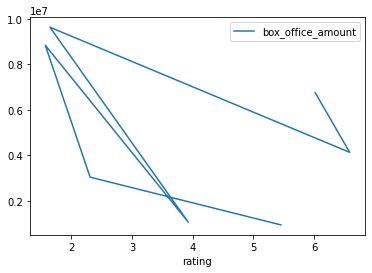

In [ ]:
import matplotlib.pyplot as plt
data.plot(x="rating", y="box_office_amount")

      Here I am trying to plot a bar graph to see the rating by movie_name
      I was also thinking to use multiple colors for bar graph. That's why I imported islice and cycle from itertools. 

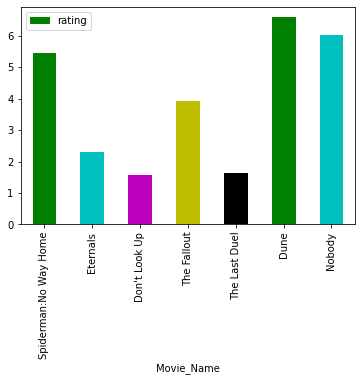

In [ ]:
from itertools import cycle, islice
random_colors = list(islice(cycle(['g', 'c', 'm', 'y', 'k']), None, len(data)))
data.plot(x='Movie_Name', y='rating', kind="bar", stacked= True, color =random_colors)

      We can also plot a bar graph to summarize the box office amount of movies. 
            Also an attempt to add the labels using a function addlabels.


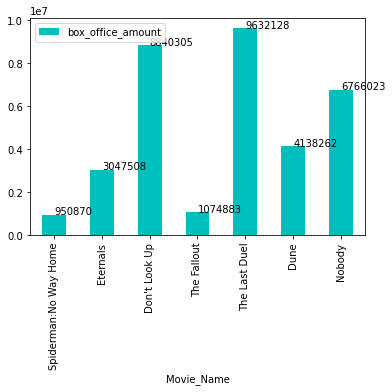

In [ ]:
data.plot(x='Movie_Name', y ='box_office_amount', kind="bar", color = 'c')
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])
  
addlabels(data.Movie_Name, data.box_office_amount)

      Here is the scatter plot of movies with box office amount which tells that how box office amount is higher even though the rating is low. 


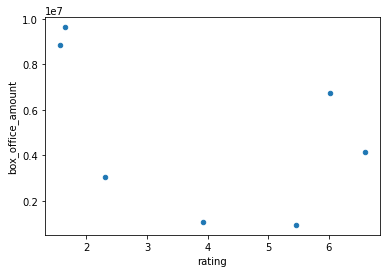

In [ ]:
data.plot.scatter(x='rating', y='box_office_amount')

       Here I tried to plot a 3D graph using columns Movie_Name, rating and box_office_amount.
       The code is showing an error because Movie_Name is a string and I was unable to plot 3D graph with one string column in Pandas dataframe using Matplotlib. 



ValueError: ignored

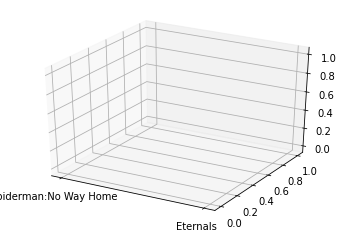

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
threedee = plt.figure().gca(projection='3d')
threedee.scatter(data['Movie_Name'], data['rating'], data['box_office_amount'])
threedee.set_xlabel('Movie_Name')
threedee.set_ylabel('rating')
threedee.set_zlabel('box_office_amount')
plt.show()

        To plot the histogram of all numeric columns separately in a range, I simply used pandas dataframe syntax.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f19c7fb6cd0>,
      dtype=object)

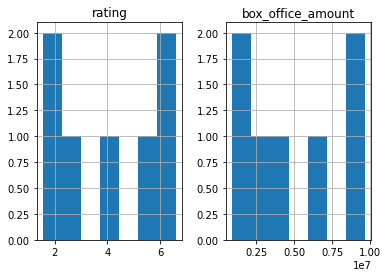

In [ ]:
data.hist(bins=7)

     Here I tried to plot the histogram of all numeric columns of dataframe together. 

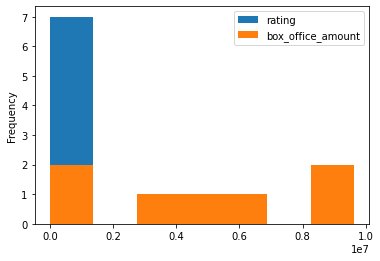

In [ ]:
data.plot.hist(bins=7)